<div id="container" style="position:relative;">
<div style="float:left"><h1> Model 2 : Linear Regression Weekly Forecast</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://twomagpiesbakery.co.uk/wp-content/uploads/2020/11/logo-no-site.jpg" />
</div>
</div>

**Steps to calculate the linear regression model for a weekly revenue forecast.**
 
In order for a successful linear regression model there are a few assumptions about the data that must be made, these are:

- There is a linear relationship between the dependent and independent variables
- The independent variables are independent of each other (no multicollinearity)
- Residuals are normally distributed
- Homoscedasticity: Variance of error terms are similar across the values of the independent variables

If these are not met, revenue forecasts will be less accurate. 

**Accuracy Evaluation** 
The models will then be evaluated by calculating the:
- R<sup>2</sup> - a statistical measure of fit that indicates how much variation of a daily revenue is explained by the independent variables in the regression model.
- Root Mean Squared Error (RMSE) - RMSE is a measure of how to spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. This is similar to the MAE score but larger errors are penalised more heavily. 
- Akaike Information Criterion (AIC) - evaluates how well a model fits the data, depending on the number of independent variables used. The best-fit model is the one that explains the greatest amount of variation using the fewest possible independent variables. 
- Mean Absolute Percentage Error (MAPE) value, which is the percentage of the average absolute values of error between the true revenue values and the predicted ones. 

The model with the best evaluation scores will be selected as the optimal linear regression model for the weekly forecast. Full discussion can be found here: [Evalution of the Models](#Evaluation-of-the-Models). 

---

# Contents 

**[EDA and Data Processing](#EDA-and-Data-Processing)**

**[1. Model 1 - All Independent Variables](#Model-1---All-Independent-Variables)**
    
- [Visualising the Daily Moving Averages](#Visualising-the-Daily-Moving-Averages)


      
**[2. Weekly Revenue Moving Average Forecast](#Weekly-Revenue-Moving-Average-Forecast)**
    
- [Visualising the Weekly Moving Averages](#Visualising-the-Weekly-Moving-Averages)



**[3. Monthly Revenue Moving Average Forecast](#Monthly-Revenue-Moving-Average-Forecast)**
    
- [Visualising the Monthly Moving Averages](#Visualising-the-Monthly-Moving-Averages)



**[Evaluation of the Models](#Evaluation-of-the-Models)**
    
**[Summary](#Summary)**

**[Next Steps](#Next-Steps)**
___

## Importing Libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
import statsmodels.api as sm
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.tseries.offsets import DateOffset

## Importing Custom Functions

In [2]:
import BakeryFunctions as bakery

## To Get Current Directory

In [3]:
working_directory = os.getcwd()
working_directory

'/Users/abimagnall/Documents/BrainStation/Capstone/Data'

## Importing Processed Datasets

In [4]:
# Importing the dataset
total_rev = pd.read_csv(working_directory+'/5_timeseries_data/total_revenue_encoded.csv', index_col=0)

# Converting the index to a datetime index 
total_rev.index = pd.to_datetime(total_rev.index)

# To validate it imported correctly 
display(total_rev.head())

,Total_Revenue,TAVG,PRCP,CPI_Electricity,CPI_Food,Bank_Holiday,Closed_Xmas,School_Holiday,Weekday,Weekend
2020-09-01,9780.76,24.0,0.00,107.6,102.8,0,0,0,1,0
2020-09-02,10037.55,27.0,0.00,107.6,102.8,0,0,0,1,0
2020-09-03,9419.30,31.0,0.07,107.6,102.8,0,0,0,1,0
2020-09-04,10606.15,27.0,0.08,107.6,102.8,0,0,0,1,0
2020-09-05,12922.00,23.0,0.01,107.6,102.8,0,0,0,0,1


# EDA and Data Processing
For the weekly forecast the following steps have to be taken: 
- Weather and CPI data is dropped as it is not suitable for forecasting 6 weeks ahead 
- Data is resampled to weekly and `Total_Revenue`, `Special Days` are summed 
- The last row of data needs to be dropped as it is not a complete week of data (only 5 days), which could cause inaccurate predictions to be made

In [5]:
total_rev_weekly = total_rev.drop(columns=['TAVG', 'PRCP', 'CPI_Electricity','CPI_Food']).copy()

In [6]:
# the 'W' option specifies Weekly frequency
total_rev_weekly = total_rev_weekly.resample('W').sum().round(2)
display(total_rev_weekly.tail(10))

,Total_Revenue,Bank_Holiday,Closed_Xmas,School_Holiday,Weekday,Weekend
2022-07-31,112021.47,0,0,7,0,0
2022-08-07,109098.80,1,0,6,0,0
2022-08-14,106518.19,0,0,7,0,0
2022-08-21,113387.44,0,0,7,0,0
2022-08-28,118277.59,0,0,7,0,0
2022-09-04,103478.40,1,0,6,0,0
2022-09-11,78442.65,0,0,0,5,2
2022-09-18,86436.14,0,0,0,5,2
2022-09-25,84465.60,0,0,0,5,2
2022-10-02,46781.18,0,0,0,5,0


To remove the incomplete week the last row of data will be dropped. 

In [7]:
total_rev_weekly = total_rev_weekly[:-1]

In [8]:
# To validate it worked 
total_rev_weekly.tail()

,Total_Revenue,Bank_Holiday,Closed_Xmas,School_Holiday,Weekday,Weekend
2022-08-28,118277.59,0,0,7,0,0
2022-09-04,103478.40,1,0,6,0,0
2022-09-11,78442.65,0,0,0,5,2
2022-09-18,86436.14,0,0,0,5,2
2022-09-25,84465.60,0,0,0,5,2


## Exploration into Multicolinearity
Similar with the daily revenue forecast, multicolinearity needs to be determined and accounted for if present. To do this a heatmap of the correlation values is plotted. 

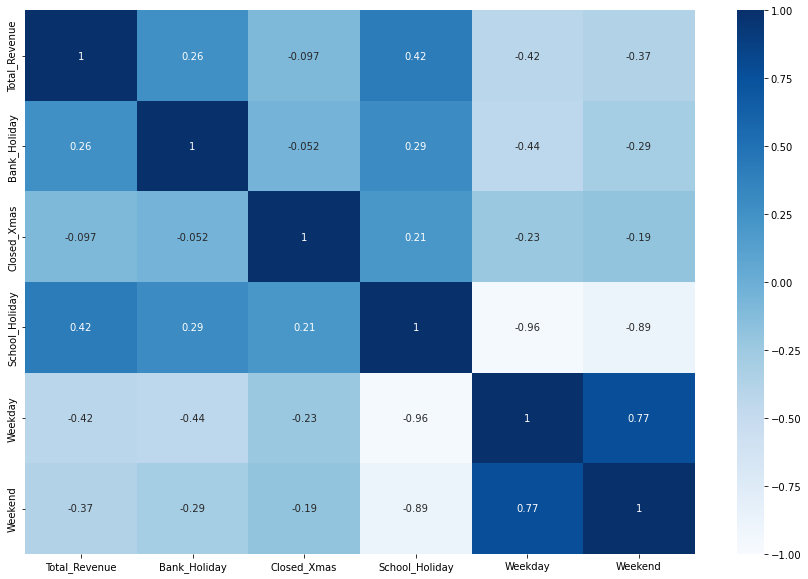

In [151]:
plt.figure(figsize=(15,10))
sns.heatmap(total_rev_weekly.corr(), annot=True, vmin=-1, vmax=1,cmap='Blues')
plt.show()

## Observations
It can be seen that `Weekday` and `Weekend`, `Weekday` and `School_Holiday` and `School_Holiday` and `Weekend` have extremely high correlations with each other. To reduce this `School_Holiday` will be dropped as it has the greatest correlation with the other two variables. 

In [59]:
linear_rev = total_rev_weekly.drop(columns=['School_Holiday']).copy()

## Setting Up The Model
The 3, 7 and 20 week moving averages will be added to the dataset and lagged by 6 weeks so that actual test total revenue does not leak into the test dataset. 

In [61]:
# The moving average is calculated using the rev_moving_average function 
bakery.rev_moving_average(linear_rev, 3, '3W_MA')
bakery.rev_moving_average(linear_rev, 7, '7W_MA')
bakery.rev_moving_average(linear_rev, 20, '20W_MA')

In [62]:
linear_rev.head()

,Total_Revenue,Bank_Holiday,Closed_Xmas,Weekday,Weekend,3W_MA,7W_MA,20W_MA
2020-09-06,62891.56,0,0,4,2,NaN,NaN,NaN
2020-09-13,64159.55,0,0,5,2,NaN,NaN,NaN
2020-09-20,65532.19,0,0,5,2,NaN,NaN,NaN
2020-09-27,58612.25,0,0,5,2,64194.43,NaN,NaN
2020-10-04,52732.89,0,0,5,2,62768.00,NaN,NaN


In [63]:
# To move the MA data over
for row in linear_rev.index:
    try:
        linear_rev.loc[row,'3W_MA_lag'] = linear_rev.loc[row-DateOffset(weeks=6),'3W_MA']
        linear_rev.loc[row,'7W_MA_lag'] = linear_rev.loc[row-DateOffset(weeks=6),'7W_MA']
        linear_rev.loc[row,'20W_MA_lag'] = linear_rev.loc[row-DateOffset(weeks=6),'20W_MA']
    except:
        continue

In [64]:
linear_rev.dropna(inplace=True)

In [65]:
linear_rev.tail(12)

,Total_Revenue,Bank_Holiday,Closed_Xmas,Weekday,Weekend,3W_MA,7W_MA,20W_MA,3W_MA_lag,7W_MA_lag,20W_MA_lag
2022-07-10,80994.74,0,0,5,2,79035.35,80248.39,75426.06,71386.73,79610.29,67430.11
2022-07-17,90259.78,0,0,5,2,80181.43,82346.45,75816.86,70804.20,78273.70,67817.36
2022-07-24,98332.00,0,0,5,0,83228.01,84598.11,76805.92,85454.07,80001.80,70809.88
2022-07-31,112021.47,0,0,0,0,89862.17,82137.58,78664.57,86108.11,77957.81,71534.62
2022-08-07,109098.80,1,0,0,0,100204.42,88387.72,81289.56,87127.56,78577.29,72649.09
2022-08-14,106518.19,0,0,0,0,106484.09,92893.76,83852.94,75649.01,79273.62,74274.80
2022-08-21,113387.44,0,0,0,0,109212.82,96522.07,85836.36,79035.35,80248.39,75426.06
2022-08-28,118277.59,0,0,0,0,109668.14,101516.06,88165.74,80181.43,82346.45,75816.86
2022-09-04,103478.40,1,0,0,0,112727.74,106842.18,89886.91,83228.01,84598.11,76805.92
2022-09-11,78442.65,0,0,5,2,111714.48,108730.56,89887.88,89862.17,82137.58,78664.57


In [66]:
linear_processed = linear_rev.copy()

In [67]:
# Splitting the train and test data
train = linear_processed.loc[linear_processed.index <= '2022-08-14'].dropna().copy()
test = linear_processed.loc[linear_processed.index > '2022-08-14'].copy()

In [68]:
# The total revenue and moving average columns are dropped from the independent variables list 
independent_variables = train.drop(columns=['3W_MA', '7W_MA', '20W_MA', 'Total_Revenue']).copy()

# Model 1 - All Independent Variables

In [75]:
# First an empty results dataframe is created to track the accuracy of the models run
model_scores = pd.DataFrame()

In [69]:
y = train['Total_Revenue']

# First the X and y values need to splitted: 
X = independent_variables

# Then the X_ constant needs to be added to give the intercept value
X_withconstant = sm.add_constant(X)

# The model is then instantiated using the sm.OLS method
lm_revenue = sm.OLS(y,X_withconstant)

# The model is fitted using the .fit() method
lm_revenue_results = lm_revenue.fit()

# The results are displayed using the .summary() method
lm_revenue_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Revenue   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     36.69
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.05e-20
Time:                        22:20:36   Log-Likelihood:                -798.82
No. Observations:                  76   AIC:                             1614.
Df Residuals:                      68   BIC:                             1632.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.188e+04   4994.054     14.394      0.000    6.19e+04    8.18e+04
Bank_Holiday  5939.5460   2918.648      2.035      0.046     115.474    1.18e+04
Closed_Xmas  -1.763e+04   1.01e+04     -1.749      0.085   -3.77e+04    2480.998
Weekday      -2334.3920    910.614     -2.564      0.013   -4151.493    -517.291
Weekend      -5659.6076   1875.092     -3.018      0.004   -9401.295   -1917.920
3W_MA_lag        0.1960      0.181      1.086      0.281      -0.164       0.556
7W_MA_lag        0.8107      0.239      3.386      0.001       0.333       1.288
20W_MA_lag      -0.7905      0.119     -6.639      0.000      -1.028      -0.553
==============================================================================
Omnibus:                        0.595   Durbin-Watson:                   0.714
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.641
Skew:                          -0.201   Prob(JB):                        0.726
Kurtosis:                       2.798   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
X_test = test.drop(columns=['Total_Revenue', '3W_MA', '7W_MA', '20W_MA']).copy()

In [71]:
X_test_withconstant = sm.add_constant(X_test)

In [72]:
# Predictions
prediction_1 = lm_revenue_results.predict(X_test_withconstant)
prediction_1

2022-08-21     92802.033721
2022-08-28     94418.555687
2022-09-04    101998.707330
2022-09-11     70904.335070
2022-09-18     75923.113707
2022-09-25     78780.415466
Freq: W-SUN, dtype: float64

In [85]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, 
                         y=train['Total_Revenue'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=test['Total_Revenue'], mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=prediction_1, mode='lines', name='Prediction 1'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title='Total Revenue (£)', 
    xaxis_title='Date',
    title='Model 1 - Linear Regression Predicted Weekly Revenue'
)
fig.show()

In [74]:
bakery.full_accuracy_report(test['Total_Revenue'],
                            prediction_1, 'weekly forecast')

The RMSE for the weekly forecast is: 14111.89

The MAE between the actual and weekly forecast revenue is 11610.11

The MAPE between the actual and weekly forecast revenue is 11.4%


## Model 1 Evaluation
The initial models achieved accuracies of: 
- R<sup>2</sup> value of 0.791 - which means **UPADTE**
- RMSE of 14111.89
- MAE score of 11610.11 - which means on average the predicted values were £11,610.11 away from the true daily revenue
- AIC score of 1614 - This sets the baseline AIC value for other models to be compared with, better models will have a lower AIC score 
- A MAPE score of 11.4% - which means.. 

Looking at the p-values from the model, `3W_MA_lag` and `Closed_Xmas` had a p-values greater than the threshold of 0.05 meaning that it is not statistically significant. Therefore, for model 2 this feature will be dropped. 

In [79]:
# To add the scores to the results table 
model_scores = bakery.add_results(model_scores, 1, 0.791, 14111.89, 1614, '11.4%', 'All initial variables')

,Model,R2,RMSE,AIC,MAPE (%),Comments
0,1,0.791,14111.89,1614,11.4%,All initial variables


# Model 2 - Dropping Variables with P-Values Greater than 0.05
Dropping all with p-value greater than 0.05: `Closed_Xmas`, `3W_MA_lag`. 

In [76]:
independent_variables_2 = independent_variables.drop(columns=['Closed_Xmas', '3W_MA_lag']).copy()

In [77]:
y = train['Total_Revenue']

# First the X and y values need to splitted: 
X = independent_variables_2

# Then the X_ constant needs to be added to give the intercept value
X_withconstant = sm.add_constant(X)

# The model is then instantiated using the sm.OLS method
lm_revenue = sm.OLS(y,X_withconstant)

# The model is fitted using the .fit() method
lm_revenue_results = lm_revenue.fit()

# The results are displayed using the .summary() method
lm_revenue_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Revenue   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     49.29
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.33e-21
Time:                        22:24:05   Log-Likelihood:                -800.92
No. Observations:                  76   AIC:                             1614.
Df Residuals:                      70   BIC:                             1628.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.284e+04   4810.860     15.140      0.000    6.32e+04    8.24e+04
Bank_Holiday  7514.4611   2835.776      2.650      0.010    1858.684    1.32e+04
Weekday      -1958.7135    901.366     -2.173      0.033   -3756.432    -160.995
Weekend      -6244.8925   1835.291     -3.403      0.001   -9905.265   -2584.520
7W_MA_lag        1.0735      0.090     11.881      0.000       0.893       1.254
20W_MA_lag      -0.8906      0.102     -8.753      0.000      -1.094      -0.688
==============================================================================
Omnibus:                        0.558   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.559
Skew:                          -0.195   Prob(JB):                        0.756
Kurtosis:                       2.845   Cond. No.                     4.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
X_test = test.drop(columns=['Total_Revenue', '3W_MA', '7W_MA', '20W_MA', 'Closed_Xmas', '3W_MA_lag']).copy()

In [81]:
X_test_withconstant = sm.add_constant(X_test)

In [82]:
# Predictions
prediction_2 = lm_revenue_results.predict(X_test_withconstant)
prediction_2

2022-08-21     91814.855642
2022-08-28     93719.150069
2022-09-04    102770.002427
2022-09-11     68675.459630
2022-09-18     73047.419112
2022-09-25     75601.901660
Freq: W-SUN, dtype: float64

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, 
                         y=train['Total_Revenue'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=test['Total_Revenue'], mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=prediction_2, mode='lines', name='Prediction 2'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title='Total Revenue (£)', 
    xaxis_title='Date',
    title='Model 2 - Linear Regression Predicted Weekly Revenue'
)
fig.show()

In [86]:
bakery.full_accuracy_report(test['Total_Revenue'],
                            prediction_2, 'Weekly forecast')

The RMSE for the Weekly forecast is: 15395.97

The MAE between the actual and Weekly forecast revenue is 13143.17

The MAPE between the actual and Weekly forecast revenue is 13.2%


## Model 2 - Accuracy Evaluation
**UPDATE**

In [87]:
# To add the scores to the results table 
model_scores = bakery.add_results(model_scores, 2, 0.779, 15395.97, 1614, '13.2%', 'Dropped Closed Xmas, 3D_MA')

,Model,R2,RMSE,AIC,MAPE (%),Comments
0,1,0.791,14111.89,1614,11.4%,All initial variables
1,2,0.779,15395.97,1614,13.2%,"Dropped Closed Xmas, 3D_MA"


# Performing VIF to Reduce Features 
For Model 2 there is a large number of independent variables included in the model, which can still lead to some multicollinearity. Therefore, a Variance Inflation Factor (VIF) test will be used to detect the remaining multicollinearity. This is done using the `vif_func` function, which utilises the `variance_inflation_factor()` method on the independent variables. Variables with large VIF scores will be removed in the next iteration. 

In [88]:
X = independent_variables_2
# vif_func is called to run the VIF test
bakery.vif_func(X)

Bank_Holiday     1.376840
Weekday          9.851082
Weekend          7.241313
7W_MA_lag       30.129846
20W_MA_lag      33.342299
dtype: float64

**Observations**: the `20W_MA_lag ` has the greatest VIF score, therefore will be removed from the next model iteration to see if this improves the VIF scores.

# Model 3 - Dropping `20W_MA_lag` 

In [89]:
independent_variables_3 = independent_variables_2.drop(columns=['20W_MA_lag']).copy()

In [90]:
y = train['Total_Revenue']

# First the X and y values need to splitted: 
X = independent_variables_3

# Then the X_ constant needs to be added to give the intercept value
X_withconstant = sm.add_constant(X)

# The model is then instantiated using the sm.OLS method
lm_revenue = sm.OLS(y,X_withconstant)

# The model is fitted using the .fit() method
lm_revenue_results = lm_revenue.fit()

# The results are displayed using the .summary() method
lm_revenue_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Revenue   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     20.57
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           2.75e-11
Time:                        22:28:49   Log-Likelihood:                -829.01
No. Observations:                  76   AIC:                             1668.
Df Residuals:                      71   BIC:                             1680.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.083e+04   6626.085      9.181      0.000    4.76e+04     7.4e+04
Bank_Holiday  4724.8973   4049.120      1.167      0.247   -3348.820    1.28e+04
Weekday      -2583.9820   1291.166     -2.001      0.049   -5158.494      -9.470
Weekend      -5415.1312   2633.746     -2.056      0.043   -1.07e+04    -163.590
7W_MA_lag        0.4338      0.076      5.682      0.000       0.282       0.586
==============================================================================
Omnibus:                       12.359   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.125
Skew:                          -0.382   Prob(JB):                       0.0771
Kurtosis:                       1.983   Cond. No.                     3.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
X_test = test.drop(columns=['Total_Revenue', '3W_MA', '7W_MA', '20W_MA', 'Closed_Xmas',
                            '3W_MA_lag','20W_MA_lag']).copy()

In [92]:
X_test_withconstant = sm.add_constant(X_test)

In [93]:
# Predictions
prediction_3 = lm_revenue_results.predict(X_test_withconstant)
prediction_3

2022-08-21     95644.438402
2022-08-28     96554.598524
2022-09-04    102256.289187
2022-09-11     72713.816042
2022-09-18     75425.191399
2022-09-25     77379.958143
Freq: W-SUN, dtype: float64

In [94]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, 
                         y=train['Total_Revenue'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=test['Total_Revenue'], mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=prediction_3, mode='lines', name='Prediction 3'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title='Total Revenue (£)', 
    xaxis_title='Date',
    title='Model 3 - Linear Regression Predicted Weekly Revenue'
)
fig.show()

In [95]:
bakery.full_accuracy_report(test['Total_Revenue'],
                            prediction_3, 'weekly forecast')

The RMSE for the weekly forecast is: 12861.2

The MAE between the actual and weekly forecast revenue is 10752.25

The MAPE between the actual and weekly forecast revenue is 10.6%


## Model 3 - Accuracy Evaluation
Despite the MAPE improving, the R<sup>2</sup> value has decreased dramatically to 0.537. 

The `Bank_Holiday` column also now has a p-value greater than 0.05, therefore for the next iteration this will be dropped. 

In [96]:
# To add the scores to the results table 
model_scores = bakery.add_results(model_scores, 3, 0.537, 12861.2, 1668, '10.6%', 'Dropped 20D MA')

,Model,R2,RMSE,AIC,MAPE (%),Comments
0,1,0.791,14111.89,1614,11.4%,All initial variables
1,2,0.779,15395.97,1614,13.2%,"Dropped Closed Xmas, 3D_MA"
2,3,0.537,12861.20,1668,10.6%,Dropped 20D MA


# Model 4 - Dropping `Bank_Holiday`

In [107]:
independent_variables_4 = independent_variables_3.drop(columns=['Bank_Holiday']).copy()

y = train['Total_Revenue']

# First the X and y values need to splitted: 
X = independent_variables_4

# Then the X_ constant needs to be added to give the intercept value
X_withconstant = sm.add_constant(X)

# The model is then instantiated using the sm.OLS method
lm_revenue = sm.OLS(y,X_withconstant)

# The model is fitted using the .fit() method
lm_revenue_results = lm_revenue.fit()

# The results are displayed using the .summary() method
lm_revenue_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Revenue   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     26.83
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           9.29e-12
Time:                        22:36:34   Log-Likelihood:                -829.73
No. Observations:                  76   AIC:                             1667.
Df Residuals:                      72   BIC:                             1677.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.458e+04   5811.562     11.112      0.000     5.3e+04    7.62e+04
Weekday    -3232.2177   1168.473     -2.766      0.007   -5561.526    -902.910
Weekend    -5042.8229   2620.906     -1.924      0.058   -1.03e+04     181.859
7W_MA_lag      0.4192      0.075      5.553      0.000       0.269       0.570
==============================================================================
Omnibus:                        8.418   Durbin-Watson:                   0.391
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                4.867
Skew:                          -0.436   Prob(JB):                       0.0877
Kurtosis:                       2.120   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
X_test = test.drop(columns=['Total_Revenue', '3W_MA', '7W_MA', '20W_MA', 'Closed_Xmas',
                            '3W_MA_lag','20W_MA_lag', 'Bank_Holiday']).copy()

X_test_withconstant = sm.add_constant(X_test)

In [109]:
# Predictions
prediction_4 = lm_revenue_results.predict(X_test_withconstant)

In [110]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, 
                         y=train['Total_Revenue'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=test['Total_Revenue'], mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=prediction_4, mode='lines', name='Prediction 4'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title='Total Revenue (£)', 
    xaxis_title='Date',
    title='Model 4 - Linear Regression Predicted Weekly Revenue'
)
fig.show()

In [111]:
bakery.full_accuracy_report(test['Total_Revenue'],
                            prediction_4, 'weekly forecast')

The RMSE for the weekly forecast is: 11663.08

The MAE between the actual and weekly forecast revenue is 10286.98

The MAPE between the actual and weekly forecast revenue is 10.2%


## Model 4 - Accuracy Evaluation
Despite the MAPE improving again, the R<sup>2</sup> value has decreased again to 0.528. 

The `Weekend` column also has a p-value greater than 0.05 so will be removed from the next iteration. 

In [136]:
# To add the scores to the results table 
model_scores = bakery.add_results(model_scores, 4, 0.528, 11663.08, 1667, '10.2%', 'Dropped Bank Holiday')

,Model,R2,RMSE,AIC,MAPE (%),Comments
0,1,0.791,14111.89,1614,11.4%,All initial variables
1,2,0.779,15395.97,1614,13.2%,"Dropped Closed Xmas, 3D_MA"
2,3,0.537,12861.20,1668,10.6%,Dropped 20D MA
3,4,0.528,11663.08,1667,10.2%,Dropped Bank Holiday


# Model 5 - Dropping `Weekend`

In [112]:
independent_variables_5 = independent_variables_4.drop(columns=['Weekend']).copy()

y = train['Total_Revenue']

# First the X and y values need to splitted: 
X = independent_variables_5

# Then the X_ constant needs to be added to give the intercept value
X_withconstant = sm.add_constant(X)

# The model is then instantiated using the sm.OLS method
lm_revenue = sm.OLS(y,X_withconstant)

# The model is fitted using the .fit() method
lm_revenue_results = lm_revenue.fit()

# The results are displayed using the .summary() method
lm_revenue_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Revenue   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     37.03
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           7.92e-12
Time:                        22:37:40   Log-Likelihood:                -831.64
No. Observations:                  76   AIC:                             1669.
Df Residuals:                      73   BIC:                             1676.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.515e+04   5910.362     11.023      0.000    5.34e+04    7.69e+04
Weekday    -4983.3767    746.236     -6.678      0.000   -6470.624   -3496.130
7W_MA_lag      0.4078      0.077      5.321      0.000       0.255       0.561
==============================================================================
Omnibus:                        4.937   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                2.902
Skew:                          -0.269   Prob(JB):                        0.234
Kurtosis:                       2.208   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
X_test = test.drop(columns=['Total_Revenue', '3W_MA', '7W_MA', '20W_MA', 'Closed_Xmas',
                            '3W_MA_lag','20W_MA_lag', 'Bank_Holiday', 'Weekend']).copy()

X_test_withconstant = sm.add_constant(X_test)

In [114]:
# Predictions
prediction_5 = lm_revenue_results.predict(X_test_withconstant)

In [159]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, 
                         y=train['Total_Revenue'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=test['Total_Revenue'], mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=prediction_5, mode='lines', name='Prediction 5'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title='Total Revenue (£)', 
    xaxis_title='Date',
    title='Model 5 - Linear Regression Predicted Weekly Revenue'
)
fig.show()

In [116]:
bakery.full_accuracy_report(test['Total_Revenue'],
                            prediction_5, 'weekly forecast')

The RMSE for the weekly forecast is: 11570.81

The MAE between the actual and weekly forecast revenue is 10020.12

The MAPE between the actual and weekly forecast revenue is 9.9%


## Model 5 - Accuracy Evaluation
Again reducing the features has improved the MAPE score, but decreased the R<sup>2</sup> value. 

The determination of which model is better (better R<sup>2</sup> vs MAPE score) will be evaluated in the [Evaluation of the Models](#Evaluation-of-the-Models) section. 

In [137]:
# To add the scores to the results table 
model_scores = bakery.add_results(model_scores, 5, 0.504, 11570.81, 1669, '9.9%', 'Dropped Weekend')

,Model,R2,RMSE,AIC,MAPE (%),Comments
0,1,0.791,14111.89,1614,11.4%,All initial variables
1,2,0.779,15395.97,1614,13.2%,"Dropped Closed Xmas, 3D_MA"
2,3,0.537,12861.20,1668,10.6%,Dropped 20D MA
3,4,0.528,11663.08,1667,10.2%,Dropped Bank Holiday
4,5,0.504,11570.81,1669,9.9%,Dropped Weekend


# Model 6 - Adding New Features
- Similar to the daily forecast, to try and improve the accuracy of the predictions, feature engineering will be applied to create 3 new columns. These columns willl show the variance between the calculated moving averages and the actual revenue, with a 6 week lag to ensure that no actual data is leaked into the test set. 

In [117]:
for row in linear_processed.index:
    linear_processed.loc[row,'3W_Var'] = linear_processed.loc[row,'3W_MA'] - linear_processed.loc[row,'Total_Revenue']
    linear_processed.loc[row,'7W_Var'] = linear_processed.loc[row,'7W_MA'] - linear_processed.loc[row,'Total_Revenue']
    linear_processed.loc[row,'20W_Var'] = linear_processed.loc[row,'20W_MA'] - linear_processed.loc[row,'Total_Revenue']

linear_processed.head()

,Total_Revenue,Bank_Holiday,Closed_Xmas,Weekday,Weekend,3W_MA,7W_MA,20W_MA,3W_MA_lag,7W_MA_lag,20W_MA_lag,3W_Var,7W_Var,20W_Var
2021-03-07,27155.95,0,0,5,2,25011.21,22382.30,34408.72,23360.33,32634.45,45384.89,-2144.74,-4773.65,7252.77
2021-03-14,28698.05,0,0,5,2,27602.74,23735.49,33031.76,19595.52,30668.29,43246.19,-1095.31,-4962.56,4333.71
2021-03-21,29639.92,0,0,5,2,28286.07,24961.29,31409.26,20224.94,28081.83,41181.90,-1353.85,-4678.63,1769.34
2021-03-28,33834.22,0,0,5,2,28497.97,25927.89,29224.79,21319.61,24330.07,38953.67,-5336.25,-7906.33,-4609.43
2021-04-04,49890.95,1,0,3,0,30724.06,27765.97,28843.68,21074.25,21917.31,36992.12,-19166.89,-22124.98,-21047.27


In [118]:
# To move the MA data over
for row in linear_rev.index:
    try:
        linear_processed.loc[row,'3W_Var_lag'] = linear_processed.loc[row-DateOffset(weeks=6),'3W_Var']
        linear_processed.loc[row,'7W_Var_lag'] = linear_processed.loc[row-DateOffset(weeks=6),'7W_Var']
        linear_processed.loc[row,'20W_Var_lag'] = linear_processed.loc[row-DateOffset(weeks=6),'20W_Var']
    except:
        continue

In [119]:
# To validate it worked
linear_processed.head()

,Total_Revenue,Bank_Holiday,Closed_Xmas,Weekday,Weekend,3W_MA,7W_MA,20W_MA,3W_MA_lag,7W_MA_lag,20W_MA_lag,3W_Var,7W_Var,20W_Var,3W_Var_lag,7W_Var_lag,20W_Var_lag
2021-03-07,27155.95,0,0,5,2,25011.21,22382.30,34408.72,23360.33,32634.45,45384.89,-2144.74,-4773.65,7252.77,NaN,NaN,NaN
2021-03-14,28698.05,0,0,5,2,27602.74,23735.49,33031.76,19595.52,30668.29,43246.19,-1095.31,-4962.56,4333.71,NaN,NaN,NaN
2021-03-21,29639.92,0,0,5,2,28286.07,24961.29,31409.26,20224.94,28081.83,41181.90,-1353.85,-4678.63,1769.34,NaN,NaN,NaN
2021-03-28,33834.22,0,0,5,2,28497.97,25927.89,29224.79,21319.61,24330.07,38953.67,-5336.25,-7906.33,-4609.43,NaN,NaN,NaN
2021-04-04,49890.95,1,0,3,0,30724.06,27765.97,28843.68,21074.25,21917.31,36992.12,-19166.89,-22124.98,-21047.27,NaN,NaN,NaN


In [120]:
# To drop the columns not required for the model 
lin_variables = linear_processed.drop(columns= ['3W_MA', '7W_MA', '20W_MA', '3W_Var', '7W_Var',
                                               '20W_Var']).copy()

In [121]:
# Splitting the train and test data
train = lin_variables.loc[lin_variables.index <= '2022-08-14'].dropna().copy()
test = lin_variables.loc[lin_variables.index > '2022-08-14'].copy()

In [130]:
independent_variables_6 = train.drop(columns='Total_Revenue').copy()

In [131]:
y = train['Total_Revenue']

# First the X and y values need to splitted: 
X = independent_variables_6

# Then the X_ constant needs to be added to give the intercept value
X_withconstant = sm.add_constant(X)

# The model is then instantiated using the sm.OLS method
lm_revenue = sm.OLS(y,X_withconstant)

# The model is fitted using the .fit() method
lm_revenue_results = lm_revenue.fit()

# The results are displayed using the .summary() method
lm_revenue_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Revenue   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     35.27
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           4.28e-20
Time:                        22:42:22   Log-Likelihood:                -718.54
No. Observations:                  70   AIC:                             1455.
Df Residuals:                      61   BIC:                             1475.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8.546e+04   4770.679     17.914      0.000    7.59e+04     9.5e+04
Bank_Holiday  7387.8801   2407.667      3.068      0.003    2573.452    1.22e+04
Closed_Xmas  -1.714e+04   7994.754     -2.144      0.036   -3.31e+04   -1150.912
Weekday      -2527.7165    773.865     -3.266      0.002   -4075.155    -980.278
Weekend      -5880.4642   1582.849     -3.715      0.000   -9045.567   -2715.362
3W_MA_lag       -0.0546      0.080     -0.681      0.498      -0.215       0.106
7W_MA_lag        0.4712      0.094      4.998      0.000       0.283       0.660
20W_MA_lag      -0.3643      0.061     -5.927      0.000      -0.487      -0.241
3W_Var_lag      -0.0981      0.080     -1.220      0.227      -0.259       0.063
7W_Var_lag       0.4277      0.108      3.978      0.000       0.213       0.643
20W_Var_lag     -0.4078      0.044     -9.349      0.000      -0.495      -0.321
==============================================================================
Omnibus:                        3.259   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.038
Skew:                           0.507   Prob(JB):                        0.219
Kurtosis:                       2.877   Cond. No.                     3.43e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.59e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
X_test = test.drop(columns=['Total_Revenue']).copy()

In [133]:
X_test_withconstant = sm.add_constant(X_test)

In [134]:
# Predictions
prediction_6 = lm_revenue_results.predict(X_test_withconstant)
prediction_6

2022-08-21     93634.466670
2022-08-28     95768.394944
2022-09-04    104582.973036
2022-09-11     69206.486733
2022-09-18     70991.011074
2022-09-25     71902.133774
Freq: W-SUN, dtype: float64

In [138]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, 
                         y=train['Total_Revenue'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=test['Total_Revenue'], mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=prediction_6, mode='lines', name='Prediction 6'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title='Total Revenue (£)', 
    xaxis_title='Date',
    title='Model 6 - Linear Regression Predicted Weekly Revenue'
)
fig.show()

In [139]:
bakery.full_accuracy_report(test['Total_Revenue'],
                            prediction_6, 'weekly forecast')

The RMSE for the weekly forecast is: 15164.45

The MAE between the actual and weekly forecast revenue is 13435.25

The MAPE between the actual and weekly forecast revenue is 13.7%


## Model 6 - Accuracy Evaluation **UPDATE**
- This has increased the R<sup>2</sup>  value and decreased the AIC score which suggests an improvement 
- However, it has increased the MAPE score slightly 
- It is deemed that the increased in R<sup>2</sup> and decreased AIC outweight the worse MAPE score as **UPDATE**

The columns `3W_MA_lag` and `3W_Var_lag` have p-values greater than 0.05, therefore will be removed from the next iteration of the model. 

In [140]:
# To add the scores to the results table 
model_scores = bakery.add_results(model_scores, 6, 0.822, 15164.45, 1455, '13.7%', 'Added variance columns')

,Model,R2,RMSE,AIC,MAPE (%),Comments
0,1,0.791,14111.89,1614,11.4%,All initial variables
1,2,0.779,15395.97,1614,13.2%,"Dropped Closed Xmas, 3D_MA"
2,3,0.537,12861.20,1668,10.6%,Dropped 20D MA
3,4,0.528,11663.08,1667,10.2%,Dropped Bank Holiday
4,5,0.504,11570.81,1669,9.9%,Dropped Weekend
5,6,0.822,15164.45,1455,13.7%,Added variance columns


# Model 7 - Removing    `3W_MA_lag` and `3W_Var_lag` 

In [141]:
independent_variables_7 = independent_variables_6.drop(columns=['3W_MA_lag', '3W_Var_lag']).copy()

In [142]:
y = train['Total_Revenue']

# First the X and y values need to splitted: 
X = independent_variables_7

# Then the X_ constant needs to be added to give the intercept value
X_withconstant = sm.add_constant(X)

# The model is then instantiated using the sm.OLS method
lm_revenue = sm.OLS(y,X_withconstant)

# The model is fitted using the .fit() method
lm_revenue_results = lm_revenue.fit()

# The results are displayed using the .summary() method
lm_revenue_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Revenue   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     40.19
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.03e-20
Time:                        22:47:40   Log-Likelihood:                -719.09
No. Observations:                  70   AIC:                             1454.
Df Residuals:                      62   BIC:                             1472.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8.406e+04   4552.025     18.467      0.000     7.5e+04    9.32e+04
Bank_Holiday  6927.5351   2360.931      2.934      0.005    2208.102    1.16e+04
Closed_Xmas  -1.805e+04   7938.086     -2.274      0.026   -3.39e+04   -2183.875
Weekday      -2546.1173    773.417     -3.292      0.002   -4092.157   -1000.078
Weekend      -5581.8909   1552.940     -3.594      0.001   -8686.173   -2477.609
7W_MA_lag        0.4036      0.048      8.347      0.000       0.307       0.500
20W_MA_lag      -0.3346      0.066     -5.055      0.000      -0.467      -0.202
7W_Var_lag       0.3388      0.080      4.230      0.000       0.179       0.499
20W_Var_lag     -0.3994      0.039    -10.139      0.000      -0.478      -0.321
==============================================================================
Omnibus:                        2.736   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.650
Skew:                           0.460   Prob(JB):                        0.266
Kurtosis:                       2.749   Cond. No.                     4.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.92e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [143]:
X_test= X_test.drop(columns=['3W_MA_lag', '3W_Var_lag']).copy()
X_test_withconstant = sm.add_constant(X_test)

In [144]:
# Predictions
prediction_7 = lm_revenue_results.predict(X_test_withconstant)
prediction_7

2022-08-21     93188.481807
2022-08-28     95021.035823
2022-09-04    103383.693265
2022-09-11     70200.610777
2022-09-18     72736.930159
2022-09-25     74044.313534
Freq: W-SUN, dtype: float64

In [145]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, 
                         y=train['Total_Revenue'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=test['Total_Revenue'], mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=test.index, 
                         y=prediction_7, mode='lines', name='Prediction 7'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title='Total Revenue (£)', 
    xaxis_title='Date',
    title='Model 7 - Linear Regression Predicted Weekly Revenue'
)
fig.show()

In [146]:
bakery.full_accuracy_report(test['Total_Revenue'],
                            prediction_7, 'weekly forecast')

The RMSE for the weekly forecast is: 14793.45

The MAE between the actual and weekly forecast revenue is 12652.13

The MAPE between the actual and weekly forecast revenue is 12.7%


## Model 7 - Accuracy Evaluation **UPDATE**
- This has slgihtly decreased the the R<sup>2</sup> value but has also decreased the MAPE score. 

In [147]:
# To add the scores to the results table 
model_scores = bakery.add_results(model_scores, 7, 0.819, 14793.45, 1454, '12.7%', 'Removed 3W MA and variance')

,Model,R2,RMSE,AIC,MAPE (%),Comments
0,1,0.791,14111.89,1614,11.4%,All initial variables
1,2,0.779,15395.97,1614,13.2%,"Dropped Closed Xmas, 3D_MA"
2,3,0.537,12861.20,1668,10.6%,Dropped 20D MA
3,4,0.528,11663.08,1667,10.2%,Dropped Bank Holiday
4,5,0.504,11570.81,1669,9.9%,Dropped Weekend
5,6,0.822,15164.45,1455,13.7%,Added variance columns
6,7,0.819,14793.45,1454,12.7%,Removed 3W MA and variance


In [158]:
print(min(total_rev_weekly['Total_Revenue']))
print(max(total_rev_weekly['Total_Revenue']))
print(total_rev_weekly['Total_Revenue'].mean())

17683.65
118277.59
66849.99962962963


# Evaluation of the Models 
To determine which model is the best and will be selected for weekly forecasting a comparison of R<sup>2</sup>, AIC, RMSE and MAPE scores needs to explored to determine which components are the most important in developing a linear regression model for timeseries forecasting. 

- **R<sup>2</sup>** - As mentioned the R<sup>2</sup> is a measure that compares the stationary part of the model to a simple mean, and denotes how much of the revenue variance is explained by the independent variables. A high R<sup>2</sup> shows the model's variance is similar to that of the true revenue values. However, is does not indicate whether or not the model is capable at making accurate future predictions, it only shows whether the model is a good fit for the observerved values. Therefore, models that have higher R<sup>2</sup> values are better at fitting the actual total revenue, but not necessarily better at predicting future values. 

- **MAPE** - this is the proportion of the average absolute difference between predicted and actual revenue values, divided by the true value. Therefore, models with a lower MAPE score are more accurate. MAPE tends to understate the impact of big but rare errors caused by extreme values. Therefore, is best utilised in conjuction with other metrics such as RMSE. However, in the dataset the the revenue varies from c. £17,700 to c.£118,000, with a mean value of £67,000 wich means **UPADTE**! 

- **RMSE** - shows the square root of the mean square eroror, and penalises greater errors more. The lower the RMSE the better the model, and it can easily be explained in real terms as it is the same unit as the total revenue. However, this statistic can mask issues with low data volumes. In addition to this, having few large errors in the sum may produce a significant increase in RMSE. 

- **AIC** - The AIC score evaluates how well the model fits the data it was generated from. It is used to compare different possible models and determine which one is the best fit, depending on the number of independent variables used to build the model and how well the model reproduces the actual revenue data. The loewer the AIC score the better and AIC penalises models that use more parameters, therefore reduces overfitting. 

Models 6 and 7 had the best R<sup>2</sup> and AIC scores, whereas model 5 had the best RMSE and MAPE scores. Model 7 has lower RMSE and MAPE scores than model 6 and only slightly lower R<sup>2</sup> value, so is deemed better than model 6. 

Model 7 or model 5:  **UPDATE** 

## Exploring Reisudals of Best Model
As stated in the introduction, for an accurate linear model, the assumptions are that:

- Residuals are normally distributed
- Homoscedasticity: Variance of error terms are similar across the values of the independent variables

In [148]:
# The model residuals and fitted values are stored as new variables
model_resids = lm_revenue_results.resid 
model_fittedvals = lm_revenue_results.fittedvalues 

<Figure size 432x288 with 0 Axes>

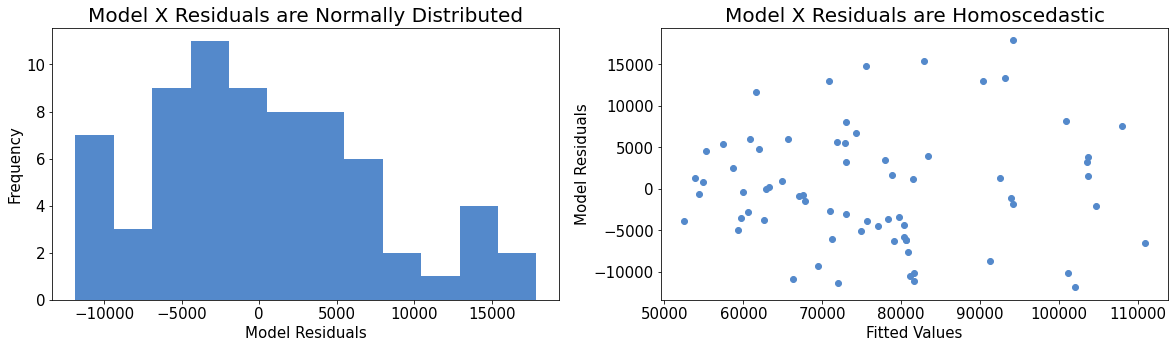

In [150]:
# To plot the residuals distribution 
plt.figure()
plt.subplots(1,2, figsize = (20,5))

# A histogram of the model residuals is plotted
plt.subplot(1,2,1)
plt.hist(model_resids, bins = 12, color = bakery.light_magpie)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Model Residuals', fontsize=15)
plt.title('Model X Residuals are Normally Distributed', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# A scatter plot of the model residuals vs fitted values is plotted
plt.subplot(1,2,2)
plt.scatter(model_fittedvals, model_resids,color = bakery.light_magpie)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Model Residuals', fontsize=15)
plt.title('Model X Residuals are Homoscedastic', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# Summary

# Next Steps
- The above process will be repeated for the monthly forecast 
- An ARIMA model will be developed for the weekly forecast to see if this improves the accuracy from the linear regression and baseline models 

>[Return to Contents](#Contents)